In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from video      import read_qcif, save_qcif, height, width
from tools      import compression_benchmark, quality_benchmark
from Difference_image import Difference_image_compute, Difference_image_reverse
from LZW        import LZW_encode, LZW_decode
from Huffman    import Huffman_encode, Huffman_decode
from DCT        import DCT_compute, DCT_inverse
from Motion_estimation import Motion_estimate_compute, Motion_estimate_inverse


# Format for qcif images
width = 176
height = 144
frame_size = width*height + 2*width//2*height//2

videos_names = []
for fname in os.listdir("./videos"):
    if fname.endswith(".qcif"):
        videos_names.append("./videos/"+fname)
print(videos_names)

['./videos/coastguard.qcif', './videos/hall.qcif', './videos/news.qcif', './videos/akiyo.qcif', './videos/carphone.qcif']


# Compression using the difference image and entropic coding

In [ ]:
for fname in videos_names:
    frames = read_qcif(fname)
    nb_frames = len(frames)
    
    diff = Difference_image_compute(frames)
    decompressed_data = Difference_image_reverse(diff)
    save_qcif("test_res_diff.qcif",decompressed_data)
    print("#############################################################################################")
    print("#--------------------------------------#")
    print("Diff on "+fname)
    quality_benchmark(frames,decompressed_data)
    print()
    print("#--------------------------------------#")
    print("Diff+LZW on "+fname)
    bitstream = LZW_encode(diff.flatten())
    decompressed_diff = LZW_decode(bitstream)
    decompressed_data = Difference_image_reverse(np.array(decompressed_diff,dtype=float).reshape(nb_frames,-1))
    compression_benchmark(frames,bitstream)
    print()
    print("#--------------------------------------#")
    print("Diff+Huffman on "+fname)
    bitstream = Huffman_encode(diff.flatten())
    decompressed_diff = Huffman_decode(bitstream)
    decompressed_data = Difference_image_reverse(np.array(decompressed_diff,dtype=float).reshape(nb_frames,-1))
    compression_benchmark(frames,bitstream)
    print("\n\n")

# Compression using the DCT, quantization with psychovisal, matrices runlength and entropic coding

100%|██████████| 300/300 [02:19<00:00,  2.15it/s]


#############################################################################################
#--------------------------------------#
DCT+quantization+runlength on ./videos/news.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  34.160046647025816
Mean MSE:  18.00270780723906


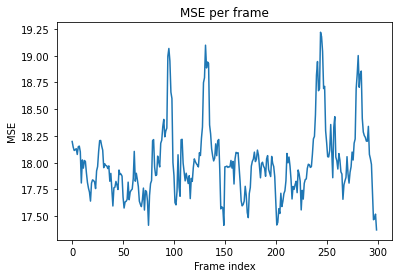

Building the dictionary:   1%|▏         | 56525/3895884 [00:00<00:06, 565215.50it/s]


#--------------------------------------#
DCT+quantization+runlength+LZW on ./videos/news.qcif


Encoding: 100%|██████████| 522871/522871 [00:00<00:00, 1222137.85it/s]


B/symb:  0.8710871738215489
Original size (MiB):  10.87646484375
Compressed size (%):  10.888589672769362

#--------------------------------------#
DCT+quantization+runlength+Huffman on ./videos/news.qcif


  0%|          | 1/300 [00:00<02:24,  2.07it/s]

B/symb:  1.273668367704826
Original size (MiB):  10.87646484375
Compressed size (%):  15.920854596310324





100%|██████████| 300/300 [02:22<00:00,  2.10it/s]


#############################################################################################
#--------------------------------------#
DCT+quantization+runlength on ./videos/akiyo.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  23.06208789281706
Mean MSE:  13.773427679573512


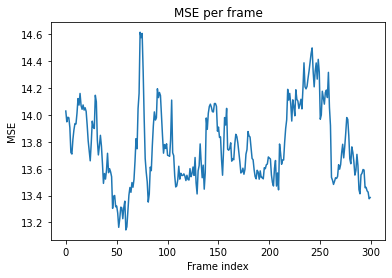

Building the dictionary:   2%|▏         | 54585/2630184 [00:00<00:04, 545806.28it/s]


#--------------------------------------#
DCT+quantization+runlength+LZW on ./videos/akiyo.qcif


Encoding:   0%|          | 0/2630185 [00:00<?, ?it/s]

B/symb:  0.5137259750280584
Original size (MiB):  10.87646484375
Compressed size (%):  6.42157468785073

#--------------------------------------#
DCT+quantization+runlength+Huffman on ./videos/akiyo.qcif


  0%|          | 1/382 [00:00<03:02,  2.09it/s]

B/symb:  0.8187843714927048
Original size (MiB):  10.87646484375
Compressed size (%):  10.23480464365881





100%|██████████| 382/382 [02:59<00:00,  2.13it/s]


#############################################################################################
#--------------------------------------#
DCT+quantization+runlength on ./videos/carphone.qcif
Original size (MiB):  13.849365234375
Compressed size (%):  36.12731398848872
Mean MSE:  10.491448626756219


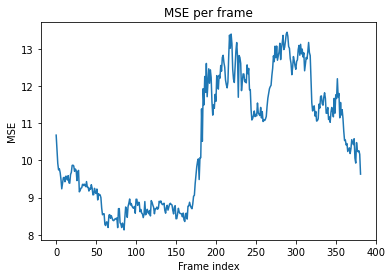

Building the dictionary:   1%|          | 54336/5246448 [00:00<00:09, 543315.18it/s]


#--------------------------------------#
DCT+quantization+runlength+LZW on ./videos/carphone.qcif


Encoding: 100%|██████████| 882852/882852 [00:00<00:00, 1186302.54it/s]


B/symb:  1.2158745229344052
Original size (MiB):  13.849365234375
Compressed size (%):  15.198431536680065

#--------------------------------------#
DCT+quantization+runlength+Huffman on ./videos/carphone.qcif


Encoding: 100%|██████████| 5246449/5246449 [00:03<00:00, 1326977.77it/s]

B/symb:  1.3743432773414777
Original size (MiB):  13.849365234375
Compressed size (%):  17.17929096676847





In [2]:
for fname in videos_names[2:]:
    frames = read_qcif(fname)
    nb_frames = len(frames)
    
    dct = DCT_compute(frames,Q='opti',offset=128)
    decompressed_data = DCT_inverse(dct,offset=128)
    save_qcif("test_res_dct.qcif",decompressed_data)
    print("#############################################################################################")
    print("#--------------------------------------#")
    print("DCT+quantization+runlength on "+fname)
    print("Original size (MiB): ", frames.size/1024**2)
    print("Compressed size (%): ", dct.size/frames.size*100)
    quality_benchmark(frames,decompressed_data)
    print()
    print("#--------------------------------------#")
    print("DCT+quantization+runlength+LZW on "+fname)
    bitstream = LZW_encode(np.array(dct.flatten()))
    compression_benchmark(frames,bitstream)
    print()
    print("#--------------------------------------#")
    print("DCT+quantization+runlength+Huffman on "+fname)
    bitstream = Huffman_encode(np.array(dct.flatten()))
    compression_benchmark(frames,bitstream)
    print("\n\n")

# Compression using the difference image, the DCT, quantization with psychovisaul matrices runlength and entropic coding

100%|██████████| 300/300 [02:23<00:00,  2.09it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/coastguard.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  58.24485304433221
Mean MSE:  30.573948600589222


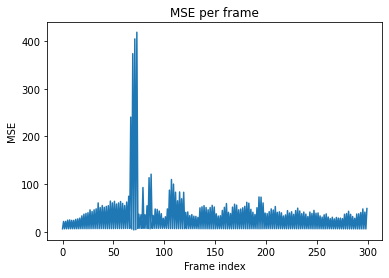

Building the dictionary:   1%|          | 58280/6642708 [00:00<00:11, 582763.04it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/coastguard.qcif


Encoding: 100%|██████████| 1106218/1106218 [00:00<00:00, 1209574.00it/s]


B/symb:  2.0369146324354657
Original size (MiB):  10.87646484375
Compressed size (%):  25.46143290544332

#--------------------------------------#
Diff+DCT+quantization+runlength+Huffman on ./videos/coastguard.qcif


Encoding: 100%|██████████| 6642709/6642709 [00:05<00:00, 1326972.20it/s]


B/symb:  2.0777318322109988
Original size (MiB):  10.87646484375
Compressed size (%):  25.971647902637486





100%|██████████| 300/300 [02:25<00:00,  2.07it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/hall.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  36.6737075617284
Mean MSE:  10.42382295173962


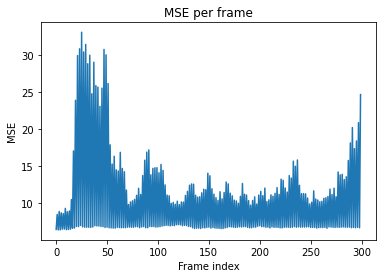

Building the dictionary:   1%|          | 39734/4182562 [00:00<00:10, 397308.17it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/hall.qcif


Encoding: 100%|██████████| 689709/689709 [00:00<00:00, 1167401.14it/s]


B/symb:  1.2095088033108867
Original size (MiB):  10.87646484375
Compressed size (%):  15.118860041386084

#--------------------------------------#
Diff+DCT+quantization+runlength+Huffman on ./videos/hall.qcif


Encoding: 100%|██████████| 4182563/4182563 [00:03<00:00, 1219876.19it/s]


B/symb:  1.3318365074354657
Original size (MiB):  10.87646484375
Compressed size (%):  16.64795634294332





100%|██████████| 300/300 [02:23<00:00,  2.08it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/news.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  21.19545279180696
Mean MSE:  25.636952511223345


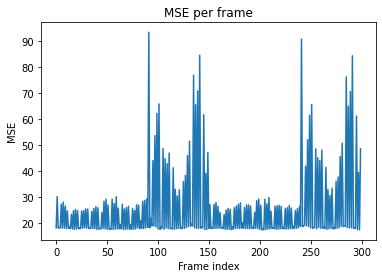

Building the dictionary:   1%|▏         | 30905/2417298 [00:00<00:07, 309028.93it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/news.qcif


Encoding:   0%|          | 0/2417299 [00:00<?, ?it/s]

B/symb:  0.5643979727833894
Original size (MiB):  10.87646484375
Compressed size (%):  7.054974659792368

#--------------------------------------#
Diff+DCT+quantization+runlength+Huffman on ./videos/news.qcif


Encoding: 100%|██████████| 2417299/2417299 [00:01<00:00, 1238665.32it/s]


B/symb:  0.7283577090347924
Original size (MiB):  10.87646484375
Compressed size (%):  9.104471362934904





100%|██████████| 300/300 [02:24<00:00,  2.07it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/akiyo.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  14.206378016273849
Mean MSE:  14.516446145482602


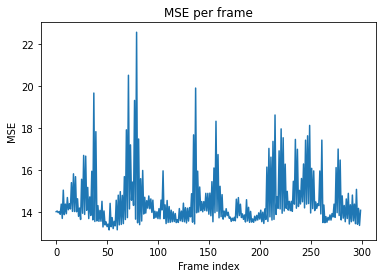

Building the dictionary:   3%|▎         | 52110/1620208 [00:00<00:03, 521035.90it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/akiyo.qcif


Encoding:   7%|▋         | 109300/1620209 [00:00<00:01, 1092933.29it/s]

B/symb:  0.30239811307519643
Original size (MiB):  10.87646484375
Compressed size (%):  3.779976413439955

#--------------------------------------#
Diff+DCT+quantization+runlength+Huffman on ./videos/akiyo.qcif


Encoding: 100%|██████████| 1620209/1620209 [00:01<00:00, 1253566.02it/s]


B/symb:  0.4473091154601571
Original size (MiB):  10.87646484375
Compressed size (%):  5.591363943251964





100%|██████████| 382/382 [03:02<00:00,  2.09it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/carphone.qcif
Original size (MiB):  13.849365234375
Compressed size (%):  29.485635422726393
Mean MSE:  30.09115726417755


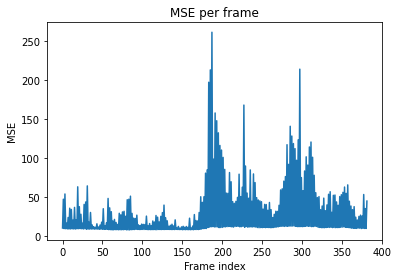

Building the dictionary:   1%|▏         | 57759/4281936 [00:00<00:07, 577552.00it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/carphone.qcif


Building the dictionary: 100%|██████████| 4281936/4281936 [00:07<00:00, 574896.76it/s]

In [ ]:
nb_diff_frame = 2
offset_seq = [128,0]

for fname in videos_names:
    frames = read_qcif(fname)
    nb_frames = len(frames)
    
    diff = Difference_image_compute(frames, nb_diff_frame)
    dct = DCT_compute(diff,Q='opti',offset=offset_seq)
    decompressed_diff = DCT_inverse(dct,offset=offset_seq)
    decompressed_data = Difference_image_reverse(decompressed_diff,nb_diff_frame)
    save_qcif("test_res_diffdct.qcif",decompressed_data)
    print("#############################################################################################")
    print("#--------------------------------------#")
    print("Diff+DCT+quantization+runlength on "+fname)
    print("Original size (MiB): ", frames.size/1024**2)
    print("Compressed size (%): ", dct.size/frames.size*100)
    quality_benchmark(frames,decompressed_data)
    print()
    print("#--------------------------------------#")
    print("Diff+DCT+quantization+runlength+LZW on "+fname)
    bitstream = LZW_encode(np.array(dct.flatten()))
    compression_benchmark(frames,bitstream)
    print()
    print("#--------------------------------------#")
    print("Diff+DCT+quantization+runlength+Huffman on "+fname)
    bitstream = Huffman_encode(np.array(dct.flatten()))
    compression_benchmark(frames,bitstream)
    print("\n\n")

# Compression using motion estimation, DCT, quantization with psychovisal, matrices runlength and entropic coding

In [ ]:
for fname in videos_names[1:2]:
    frames = read_qcif(fname,2)
    nb_frames = len(frames)
    
    symbols = Motion_estimate_compute(frames)
    decompressed_data = Motion_estimate_inverse(symbols)
    save_qcif("test_res_diff.qcif",decompressed_data)
    print("#############################################################################################")
    print("#--------------------------------------#")
    print("Diff on "+fname)
    quality_benchmark(frames,decompressed_data)
    print()
    print("#--------------------------------------#")
    print("Diff+LZW on "+fname)
    bitstream = LZW_encode(diff.flatten())
    decompressed_diff = LZW_decode(bitstream)
    decompressed_data = Difference_image_reverse(np.array(decompressed_diff,dtype=float).reshape(nb_frames,-1),5)
    compression_benchmark(frames,bitstream)
    print()
    print("#--------------------------------------#")
    print("Diff+Huffman on "+fname)
    bitstream = Huffman_encode(diff.flatten())
    decompressed_diff = Huffman_decode(bitstream)
    decompressed_data = Difference_image_reverse(np.array(decompressed_diff,dtype=float).reshape(nb_frames,-1),5)
    compression_benchmark(frames,bitstream)
    print("\n\n")